In [15]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
import seaborn as sns
data = pd.read_csv('./accuracy_full.csv')

In [8]:
%matplotlib inline

In [2]:
data.head()

,Unnamed: 0,clf name & configuration,AP,MagicTelescope,abalone,anneal,ar1,arrhythmia,audiology,autos,...,soybean,spambase,splice,teachingAssistant,tic-tac-toe,vote,vowel,waveform-5000,yeast,zoo
0,7c81560b1f077f25e0dd594f5bf4ad86,weka.classifiers.bayes.NaiveBayes-['-K'],0.9615,0.9967,0.6253,0.8608,0.8843,0.6504,0.7168,0.6780,...,0.9444,0.9854,0.9991,0.5497,0.9958,0.9011,0.6909,0.8012,0.6098,0.9604
1,1d516aebeabbf2a07ca7e8ebe18d97c8,"weka.classifiers.bayes.BayesNet-['-Q', 'weka.c...",NaN,0.8395,0.5688,NaN,0.9256,NaN,NaN,NaN,...,NaN,NaN,NaN,0.5166,0.9019,0.9655,0.7374,NaN,0.5761,0.9505
2,aa8e22e74a528ca8c34f022da26e6b6e,weka.classifiers.bayes.NaiveBayes-[],0.9594,0.8944,0.5808,0.6882,0.8595,0.6173,0.7168,0.6098,...,0.9312,0.8133,0.9925,0.5298,0.9916,0.9011,0.6303,0.7998,0.5856,0.9406
3,e4703dbfb0fd5afe7abb4d354a9d37f0,weka.classifiers.bayes.BayesNet-[],NaN,0.9984,0.6299,0.9131,0.9256,0.7168,0.7478,0.7073,...,0.9531,NaN,NaN,0.9073,0.9990,0.9011,0.6253,NaN,0.6004,0.9307
4,caf621af10216ec1210297567df473e1,"weka.classifiers.bayes.BayesNet-['-Q', 'weka.c...",NaN,NaN,0.6775,0.9432,0.9256,NaN,NaN,0.7854,...,0.9327,NaN,NaN,0.9205,0.9990,0.9563,0.8303,NaN,0.6024,NaN


In [3]:
data_history= data.iloc[:, 2:].copy()

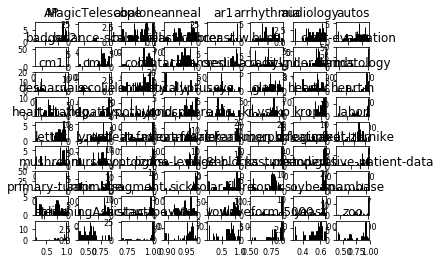

In [31]:
t = data_history.hist(bins=100, color='steelblue', edgecolor='black', linewidth=1.0, xlabelsize=8, ylabelsize=8, grid=False)
# plt.tight_layout(rect=(0, 0, 2, 2))

In [7]:
data_history.describe()

,AP,MagicTelescope,abalone,anneal,ar1,arrhythmia,audiology,autos,badges2,balance-scale,...,soybean,spambase,splice,teachingAssistant,tic-tac-toe,vote,vowel,waveform-5000,yeast,zoo
count,49.000000,57.000000,61.000000,60.000000,62.000000,57.000000,57.000000,60.000000,61.00000,61.000000,...,60.000000,54.000000,55.000000,61.000000,61.000000,61.000000,61.000000,54.000000,61.000000,59.000000
mean,0.924343,0.914574,0.632536,0.852503,0.905879,0.610765,0.656184,0.669097,0.99883,0.791790,...,0.849243,0.930785,0.869207,0.522961,0.942564,0.950913,0.677630,0.793074,0.541989,0.795780
std,0.046357,0.090206,0.037053,0.063289,0.026954,0.068615,0.160168,0.139438,0.00425,0.084076,...,0.201654,0.072013,0.188026,0.150465,0.090268,0.021099,0.249163,0.080794,0.084657,0.184834
min,0.735000,0.701100,0.536000,0.688200,0.760300,0.440300,0.252200,0.326800,0.96940,0.462400,...,0.131800,0.730700,0.243600,0.324500,0.699400,0.894300,0.090900,0.513200,0.303200,0.405900
25%,0.925200,0.851100,0.601600,0.798400,0.900800,0.559700,0.535400,0.620750,1.00000,0.776000,...,0.889125,0.884550,0.782750,0.410600,0.915400,0.949400,0.630300,0.763150,0.510100,0.643600
50%,0.933800,0.894400,0.645700,0.870800,0.913250,0.623900,0.716800,0.695150,1.00000,0.800000,...,0.925300,0.929900,0.942000,0.529800,0.988500,0.956300,0.755600,0.796600,0.571400,0.901000
75%,0.953000,0.999900,0.657200,0.905600,0.925600,0.661500,0.787600,0.763425,1.00000,0.838400,...,0.941400,0.999250,0.998900,0.582800,0.999000,0.965500,0.819200,0.859950,0.593000,0.920800
max,0.961500,1.000000,0.690200,0.943200,0.933900,0.743400,0.840700,0.863400,1.00000,0.904000,...,0.994100,0.999600,0.999400,0.927200,1.000000,0.974700,0.991900,0.868800,0.651600,0.970300


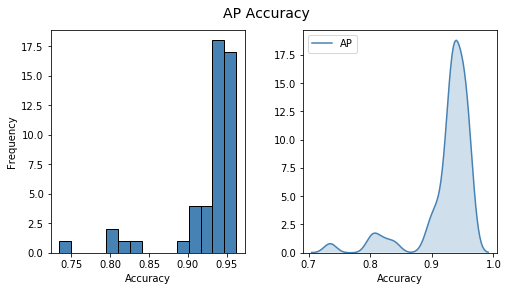

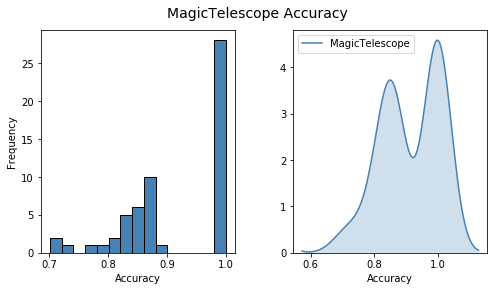

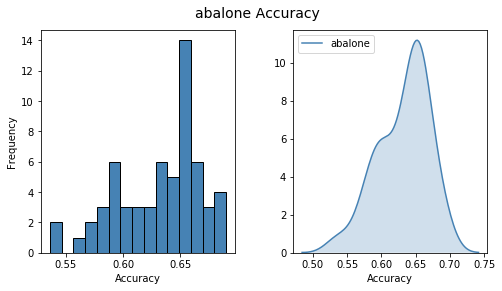

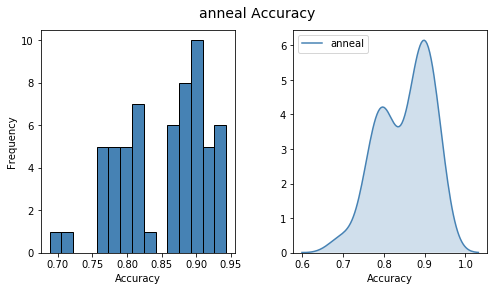

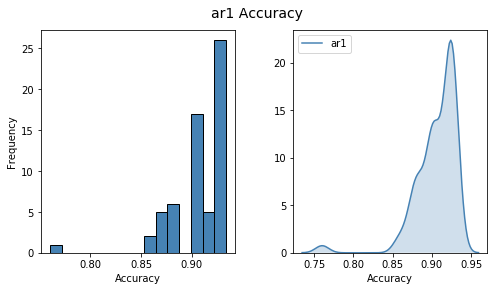

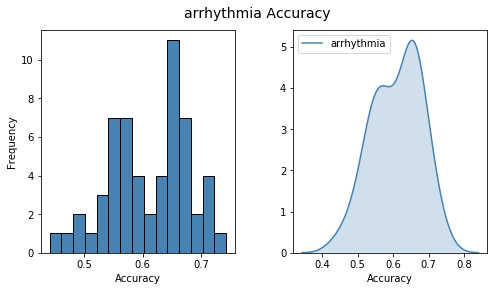

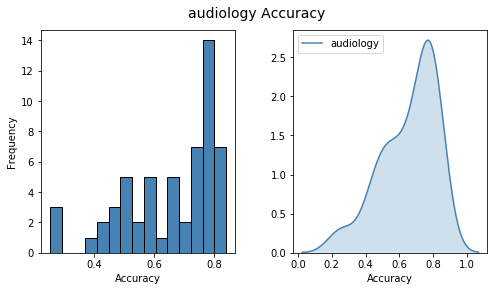

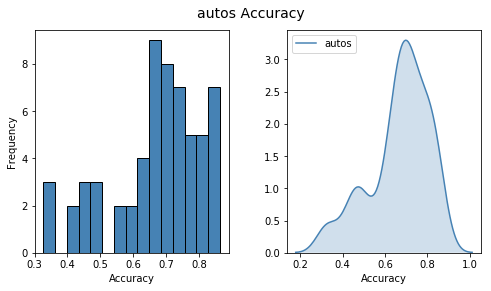

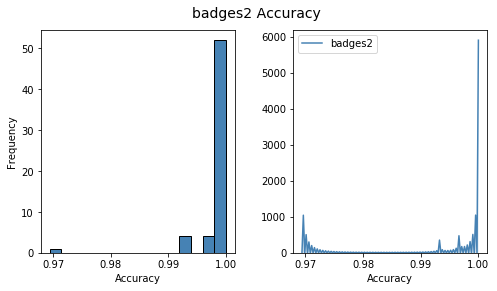

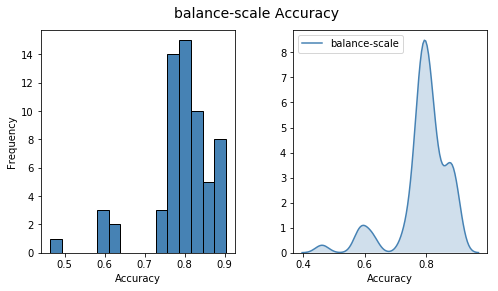

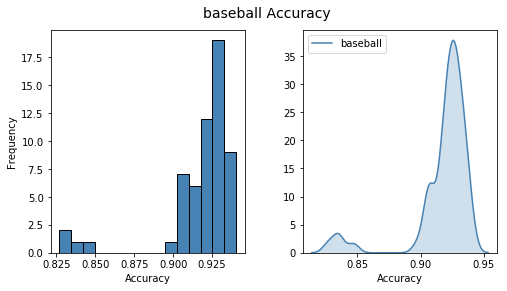

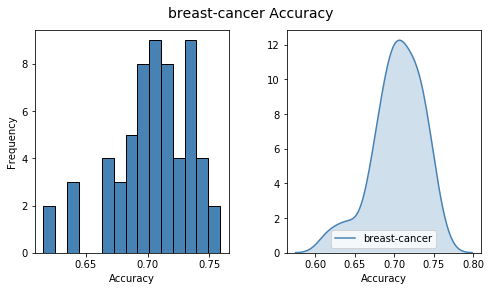

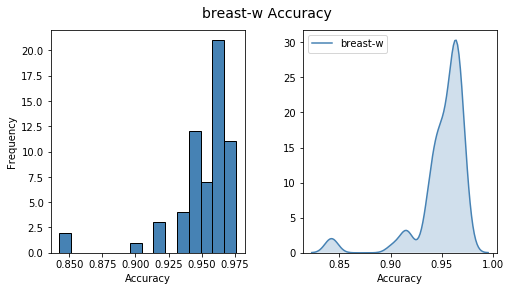

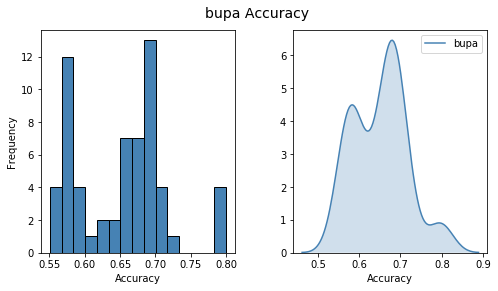

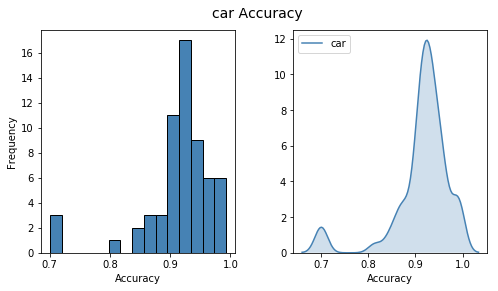

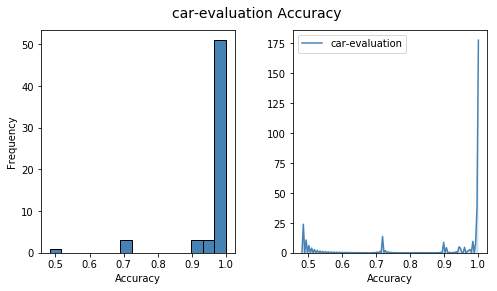

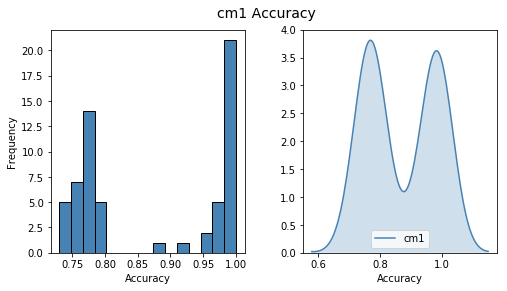

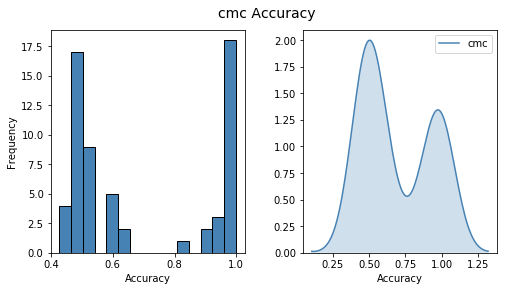

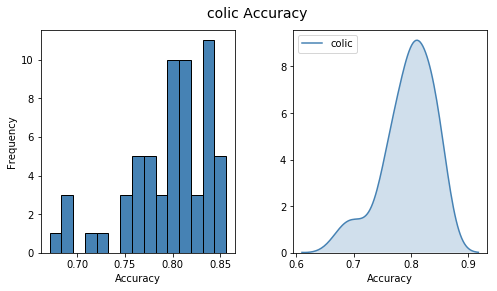

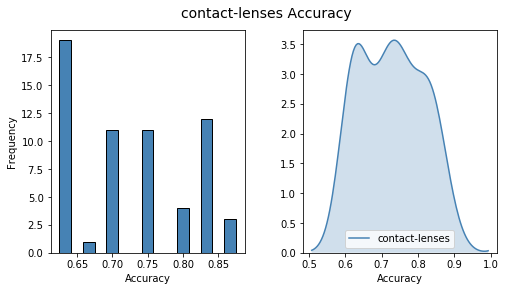

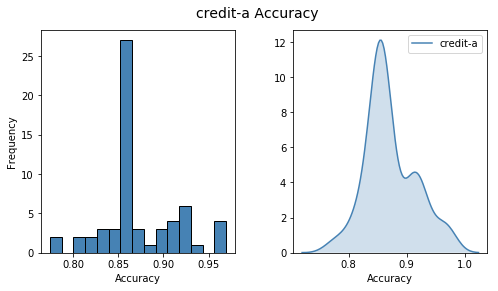

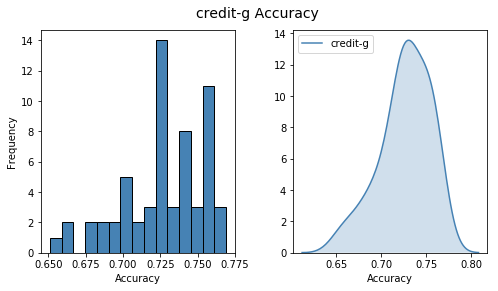

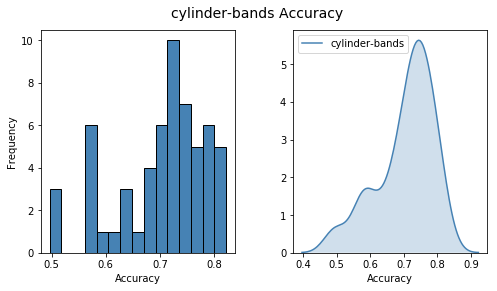

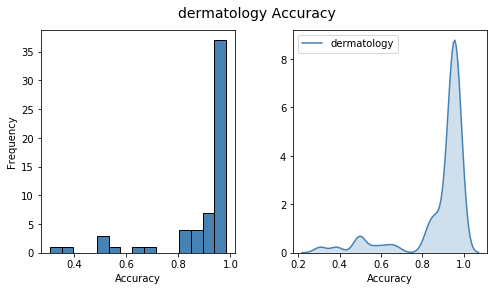

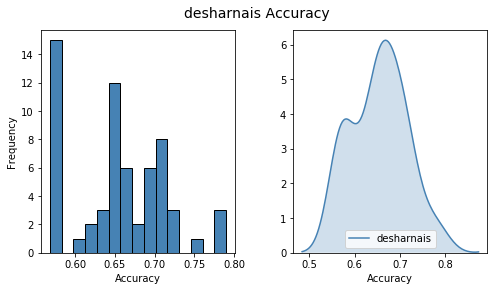

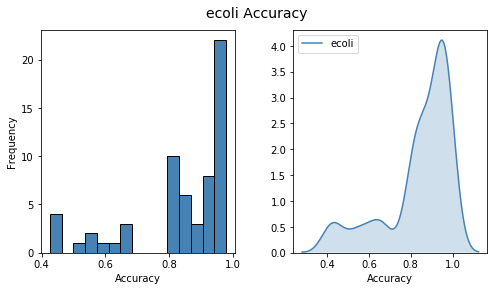

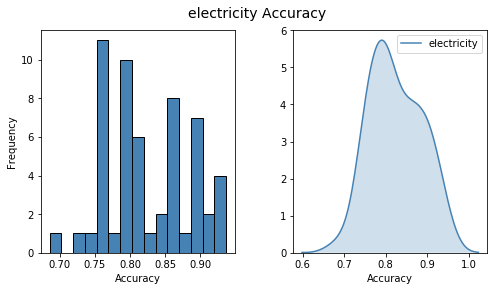

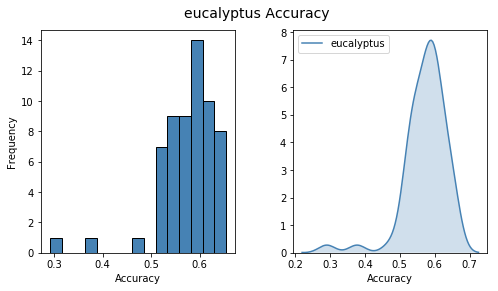

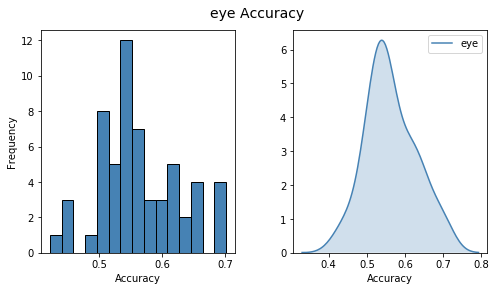

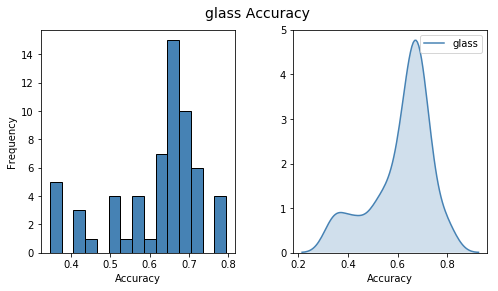

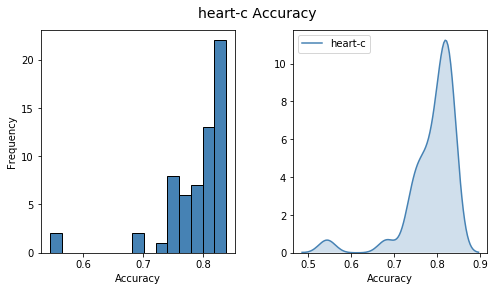

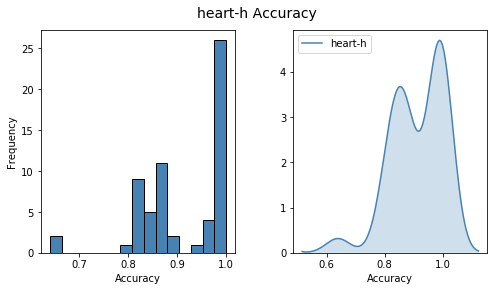

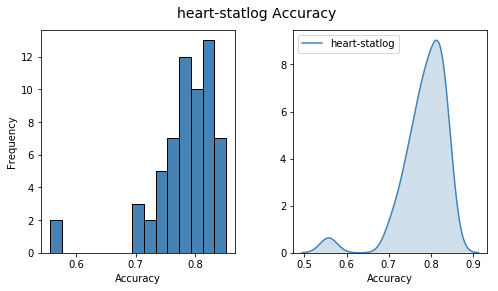

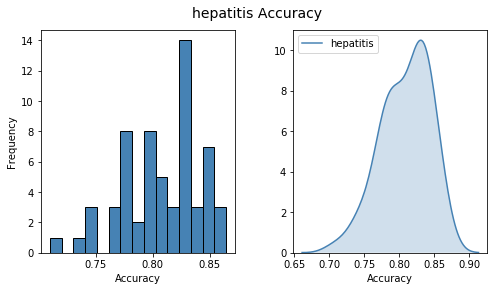

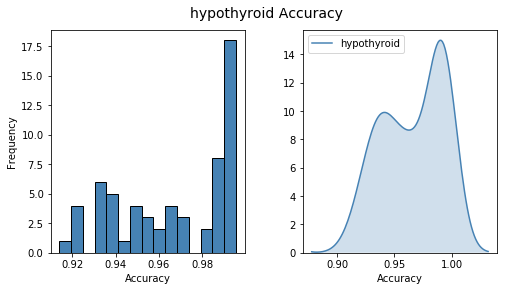

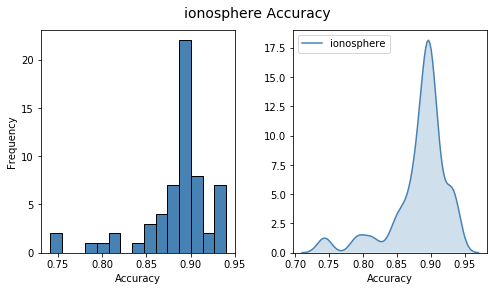

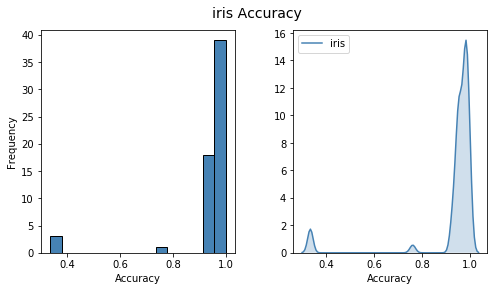

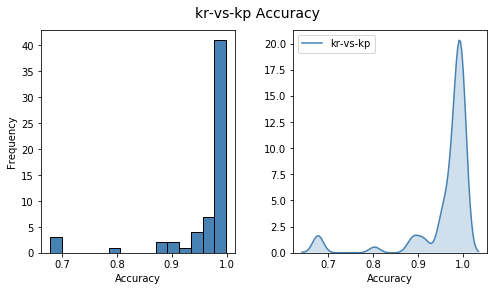

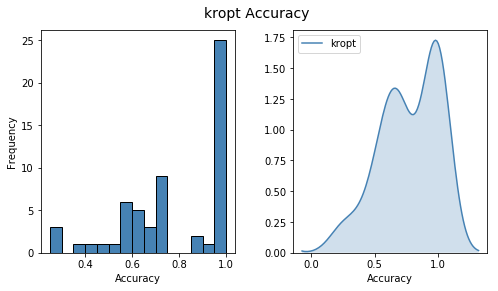

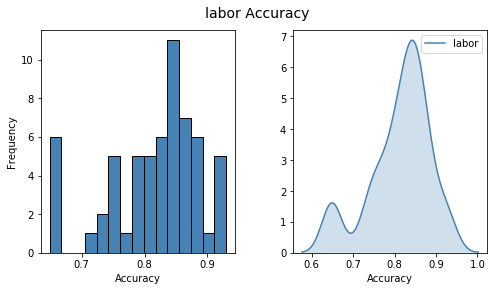

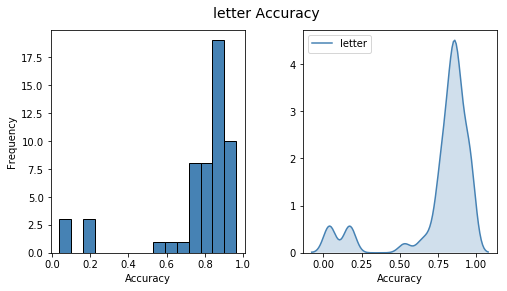

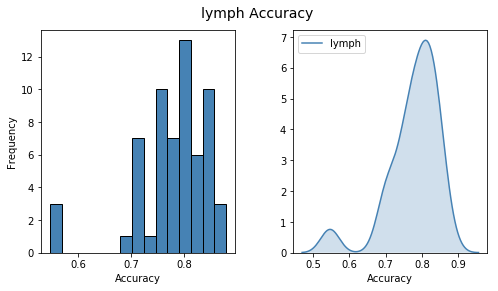

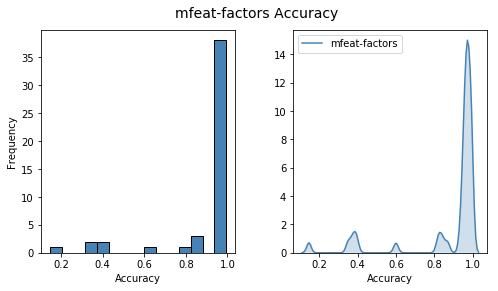

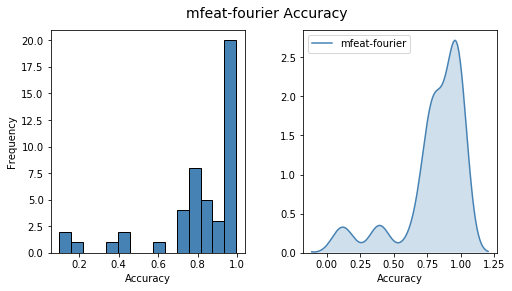

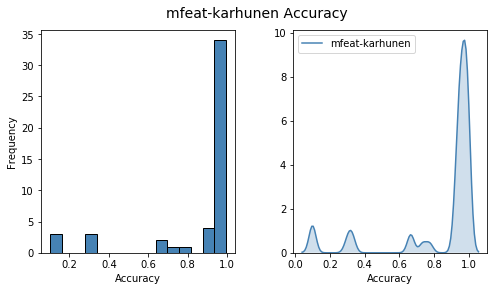

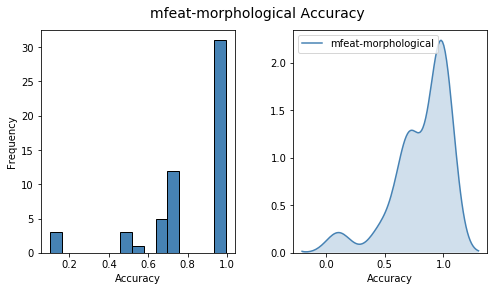

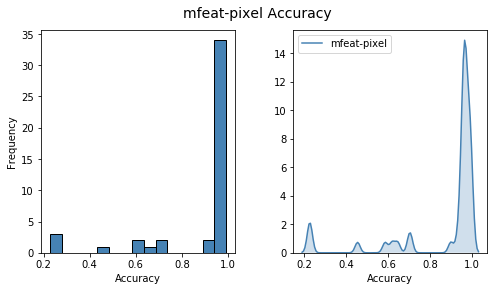

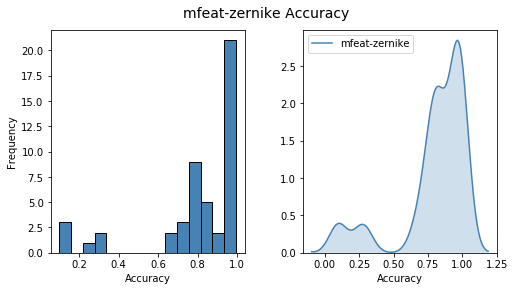

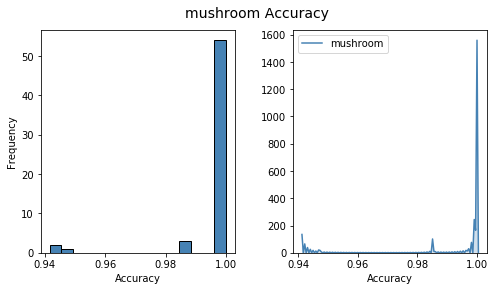

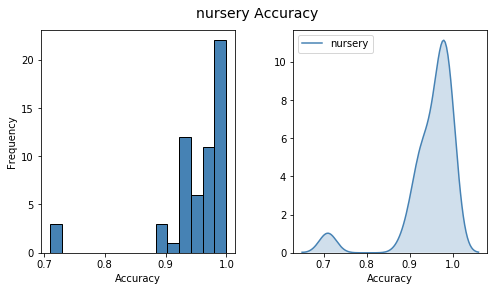

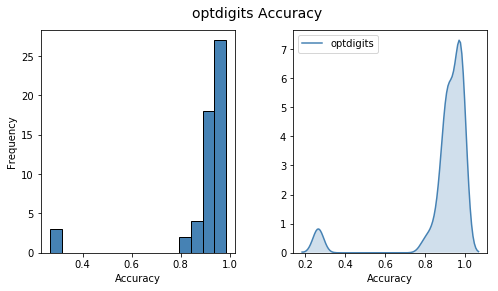

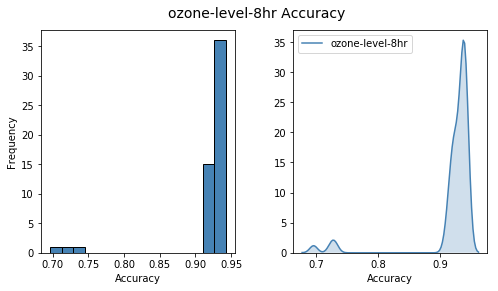

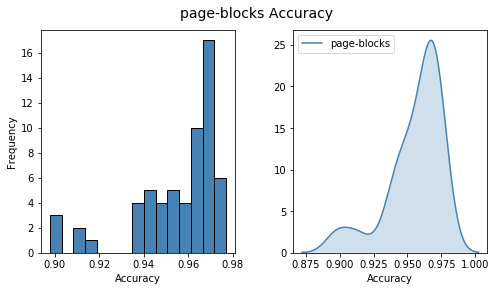

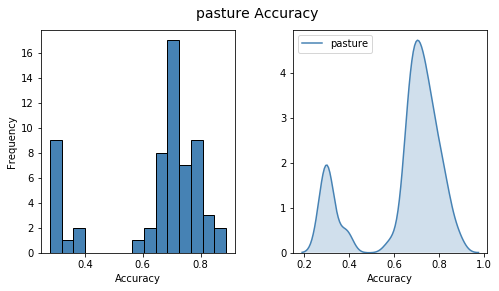

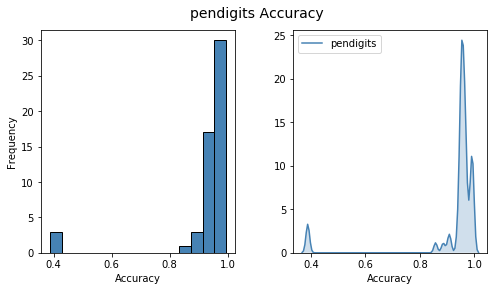

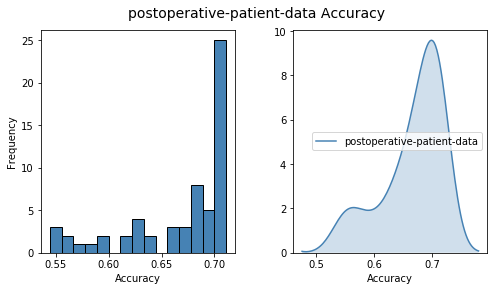

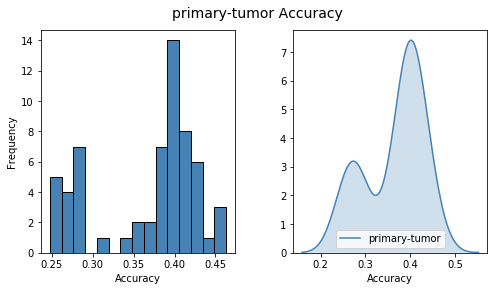

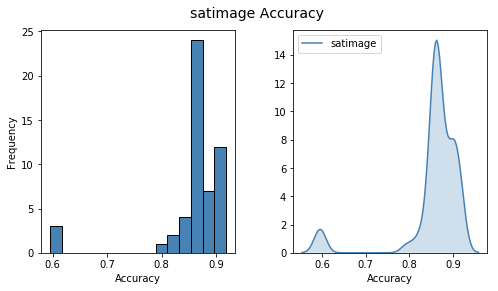

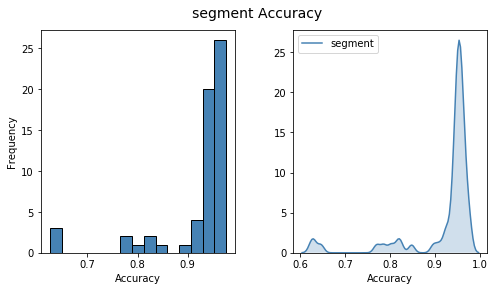

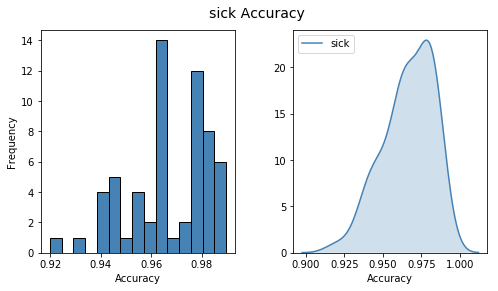

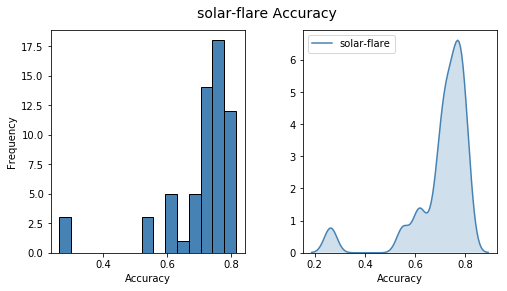

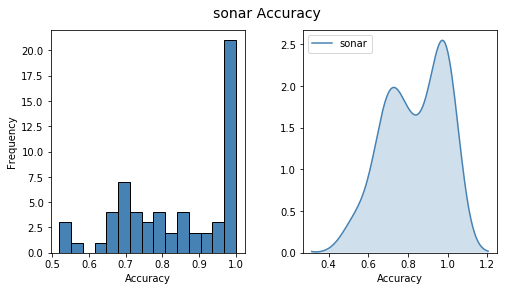

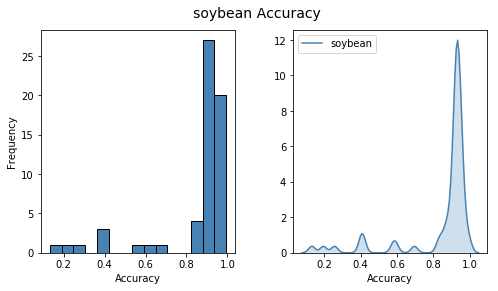

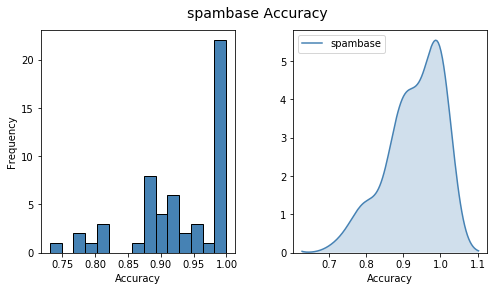

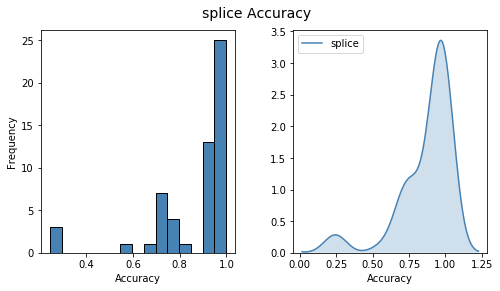

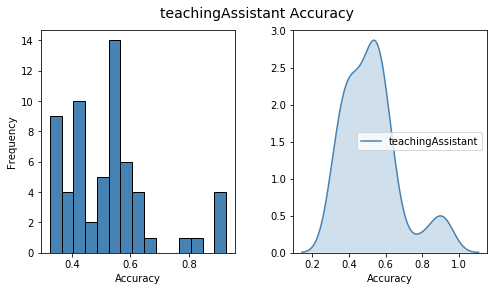

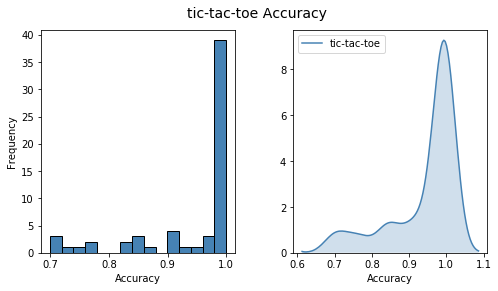

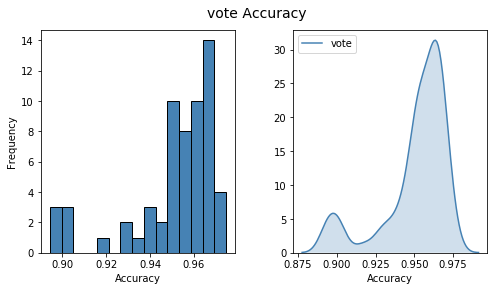

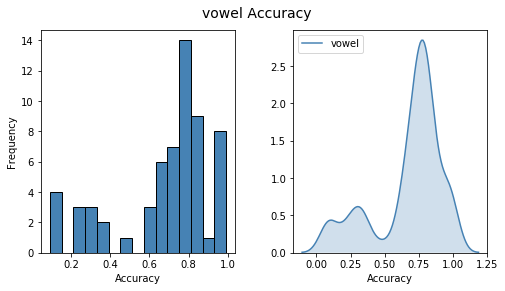

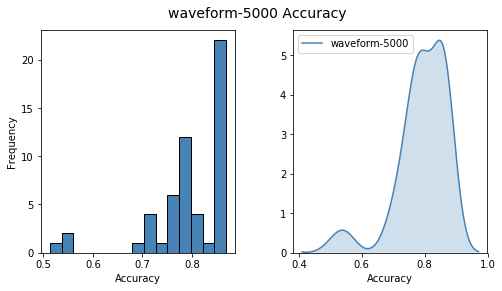

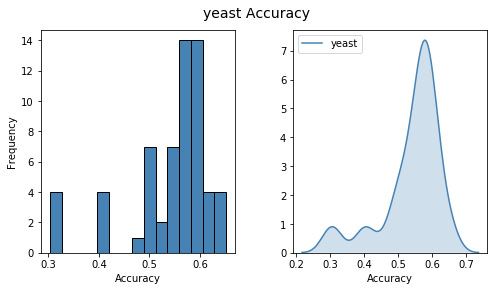

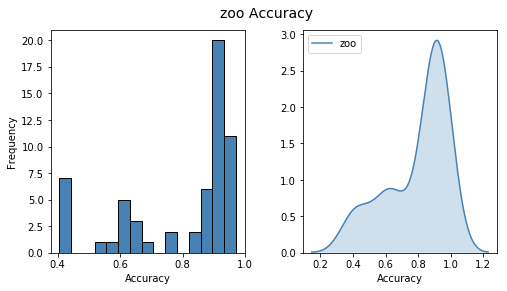

In [54]:
for i in range(72):
    # Histogram 
    fig = plt.figure(figsize=(8, 4))
    title = fig.suptitle( data_history.columns.values[i] + ' Accuracy', fontsize=14)
    fig.subplots_adjust(top=0.9, wspace=0.3)
    ax = fig.add_subplot(1,2,1)
    ax.set_xlabel('Accuracy')
    ax.set_ylabel('Frequency')
    freq, bins, patches = ax.hist(data_history.iloc[:,i], color='steelblue', bins=15, edgecolor='black', linewidth=1 )
    
    # Density Plot

    fig.subplots_adjust(top=0.9, wspace=0.3)
    ax1 = fig.add_subplot(1,2,2)
    ax1.set_xlabel('Accuracy')
    sns.kdeplot(data_history.iloc[:,i], ax=ax1, shade=True, color='steelblue')


In [67]:
data_drop= data.drop(columns='Unnamed: 0').copy()

In [118]:
data_drop.iloc[0,1:].astype('float64').describe()
# data_history.iloc[:,1]

count    72.000000
mean      0.840289
std       0.145253
min       0.451300
25%       0.739900
50%       0.884850
75%       0.961575
max       0.999100
Name: 0, dtype: float64

(array([ 1.,  1.,  3.,  0.,  2.,  4.,  3.,  5.,  5.,  1.,  8.,  4.,  6.,
        12., 17.]),
 array([0.4513 , 0.48782, 0.52434, 0.56086, 0.59738, 0.6339 , 0.67042,
        0.70694, 0.74346, 0.77998, 0.8165 , 0.85302, 0.88954, 0.92606,
        0.96258, 0.9991 ]),
 <a list of 15 Patch objects>)

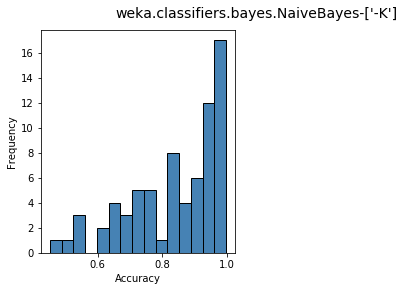

In [113]:
fig = plt.figure(figsize=(8, 4))
title = fig.suptitle( data_drop['clf name & configuration'][0], fontsize=14)
fig.subplots_adjust(top=0.9, wspace=0.3)
ax = fig.add_subplot(1,2,1)
ax.set_xlabel('Accuracy')
ax.set_ylabel('Frequency')
ax.hist(data_drop.iloc[0,1:].astype('float64'), color='steelblue', bins=15, edgecolor='black', linewidth=1 )


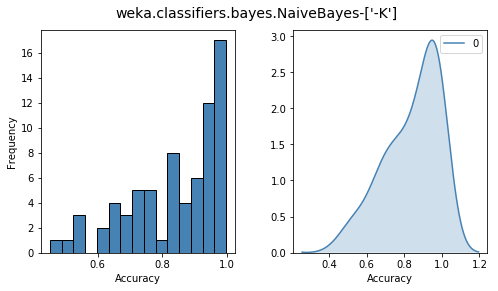

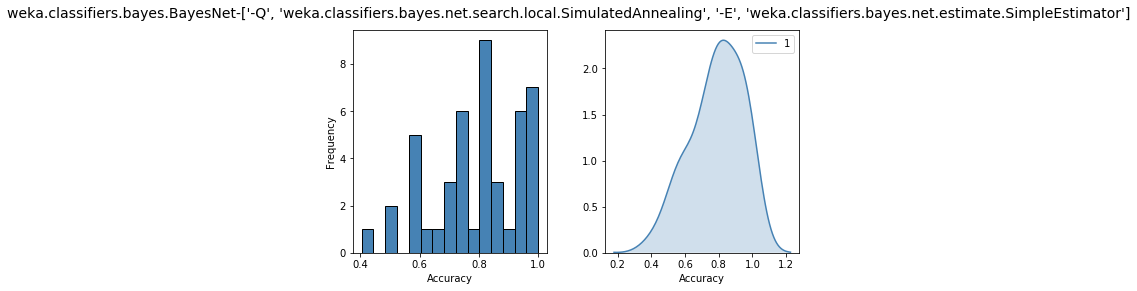

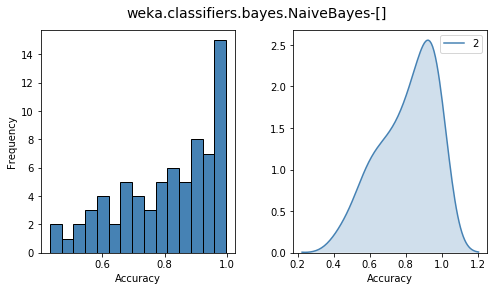

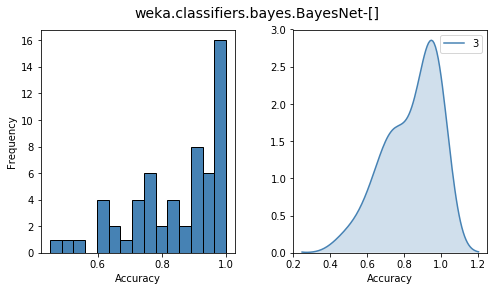

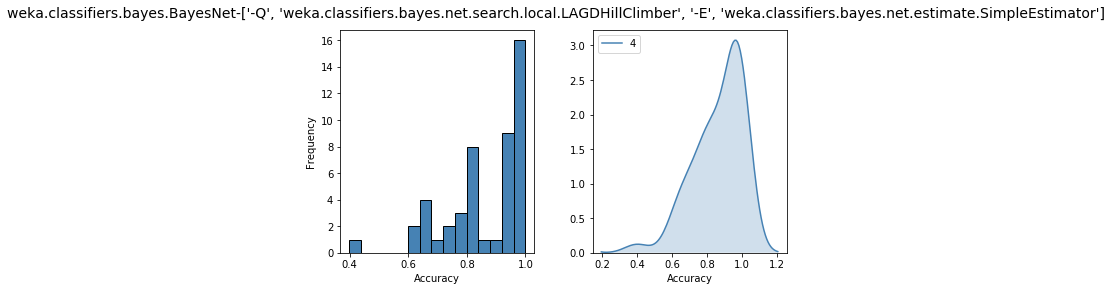

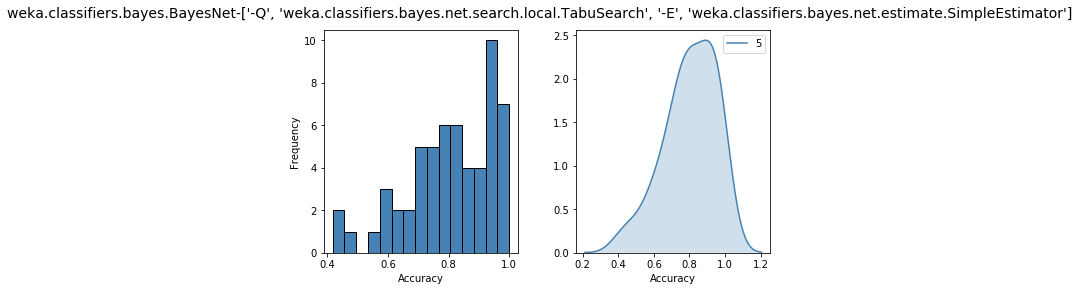

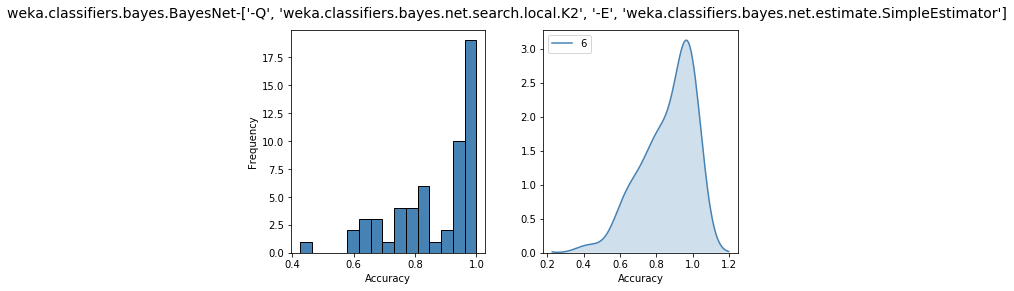

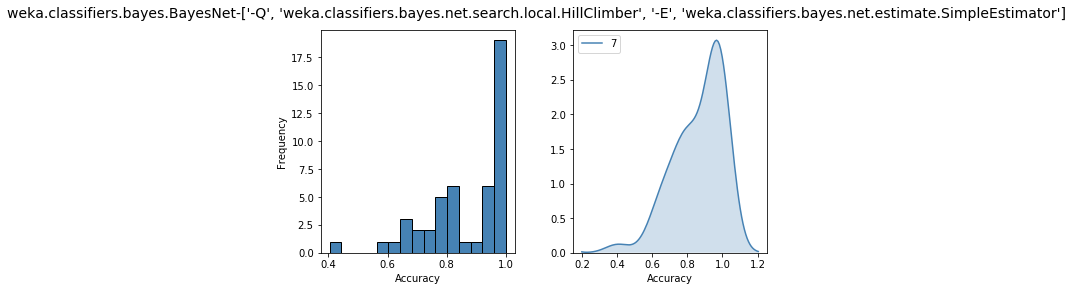

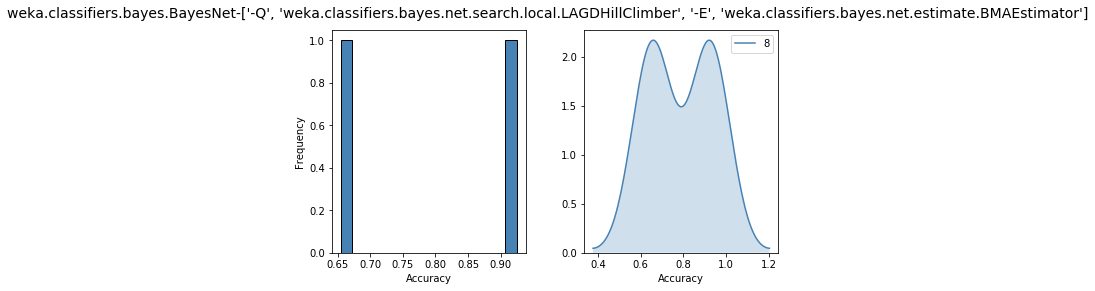

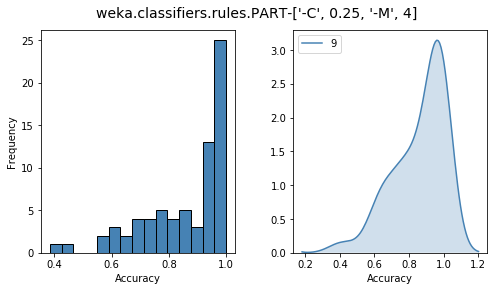

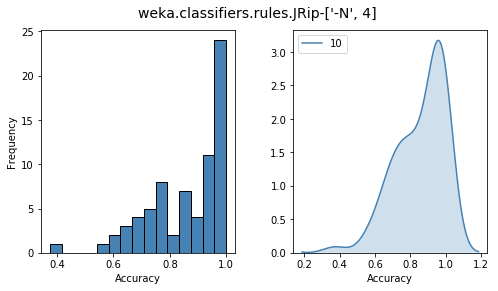

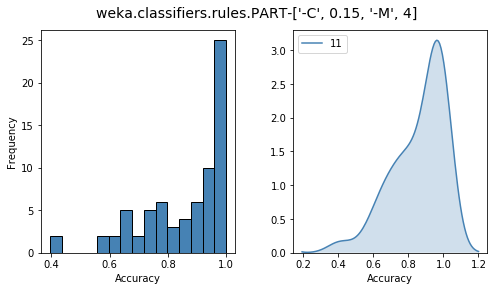

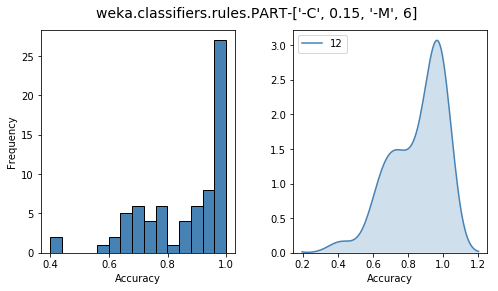

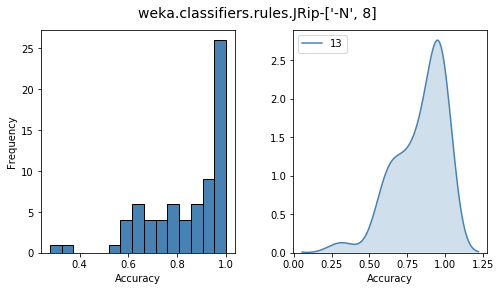

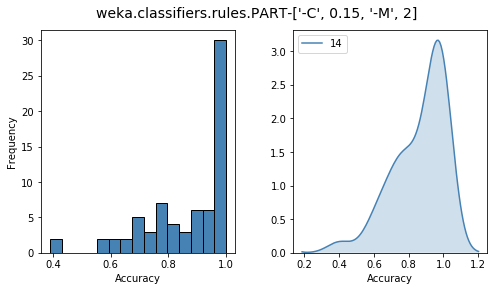

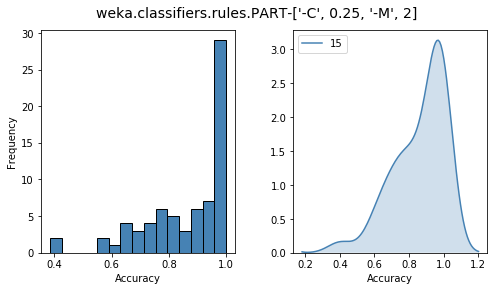

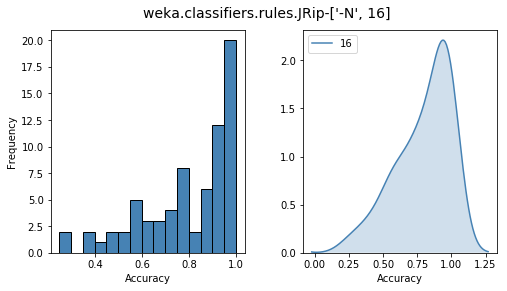

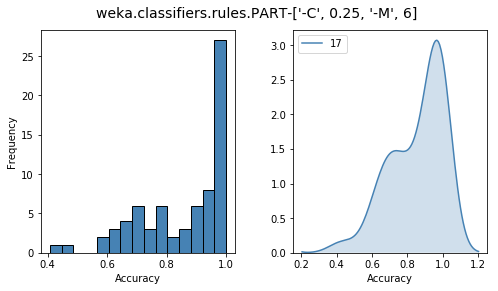

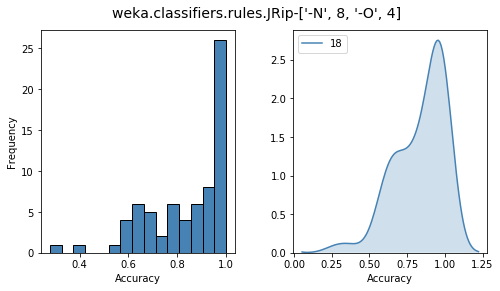

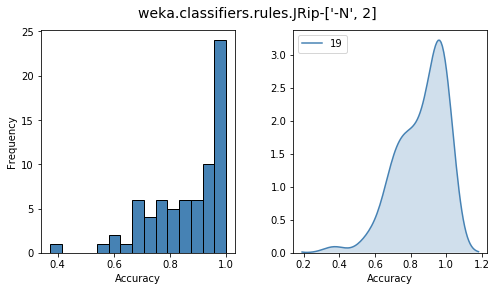

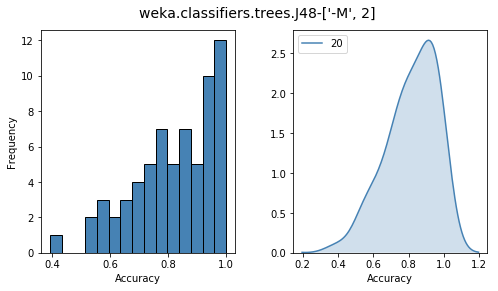

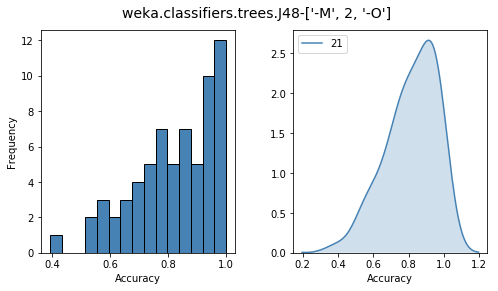

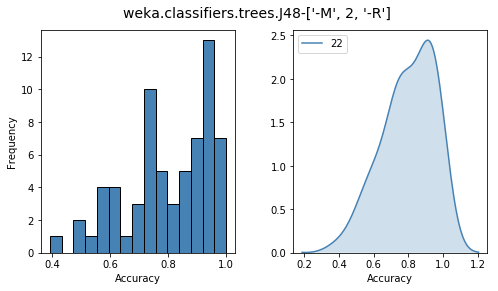

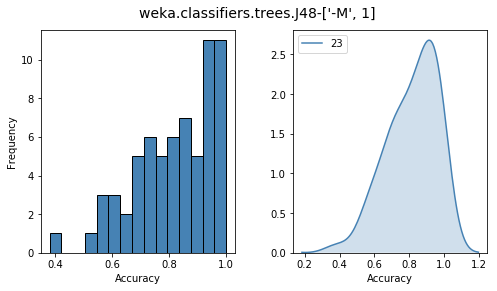

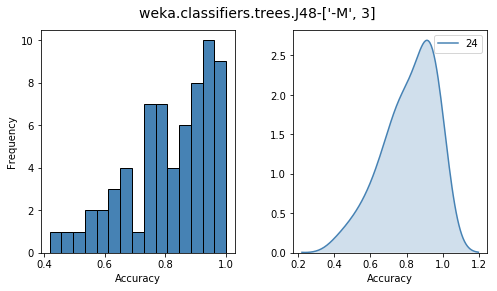

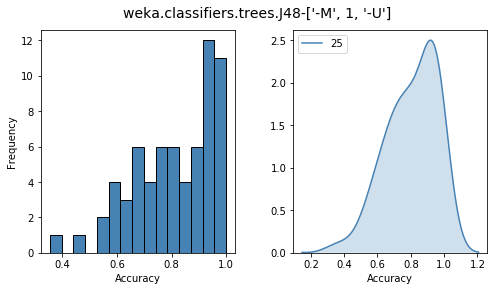

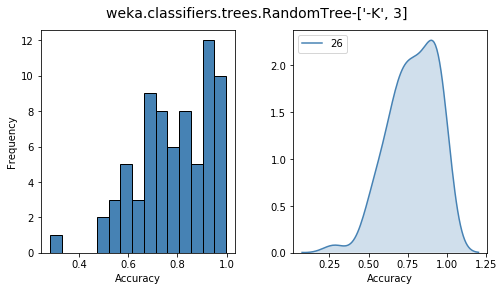

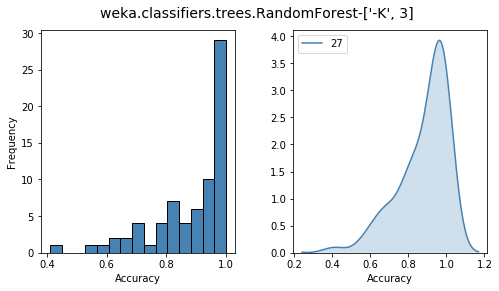

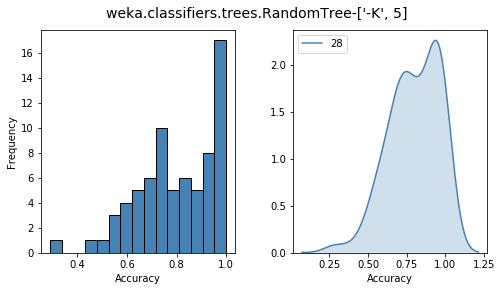

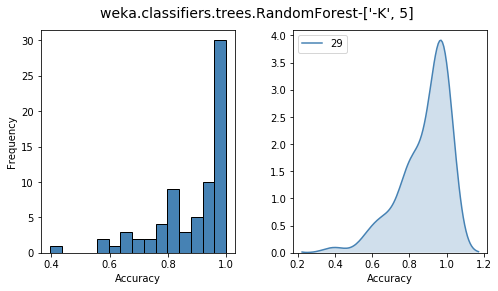

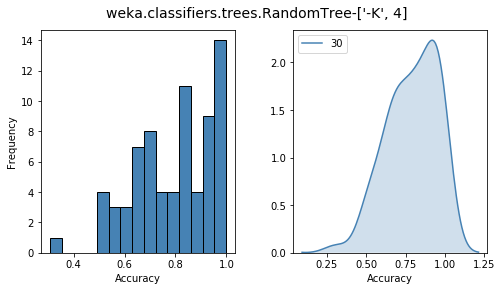

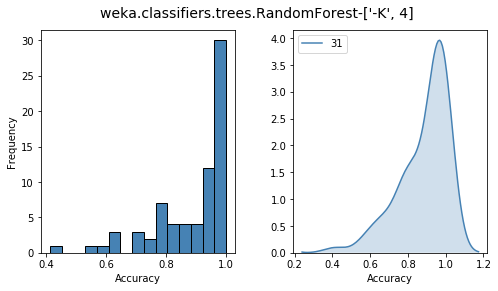

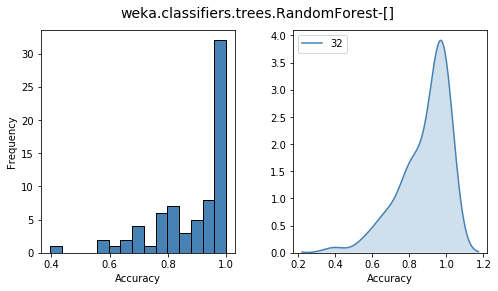

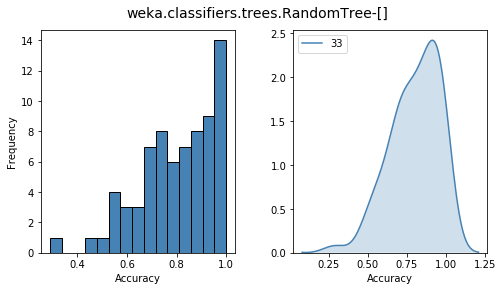

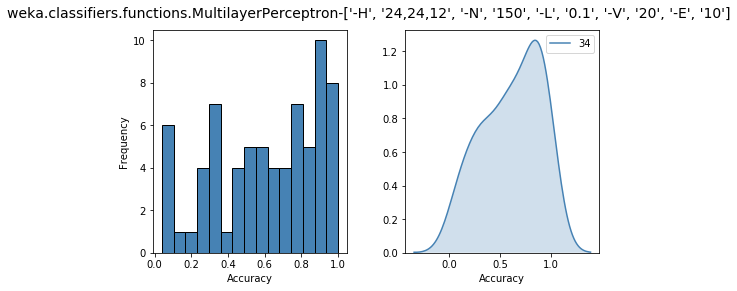

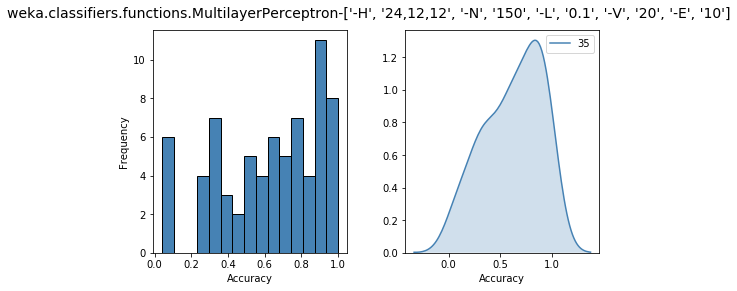

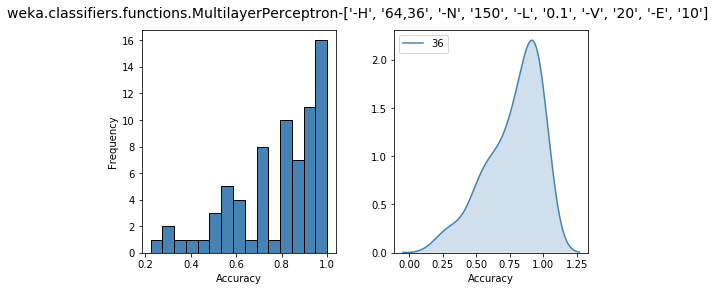

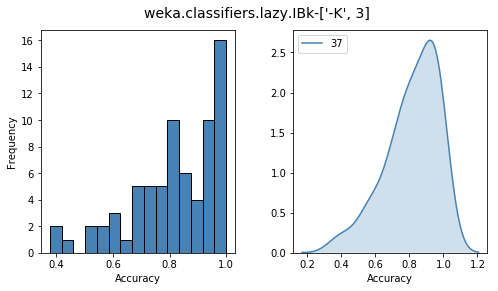

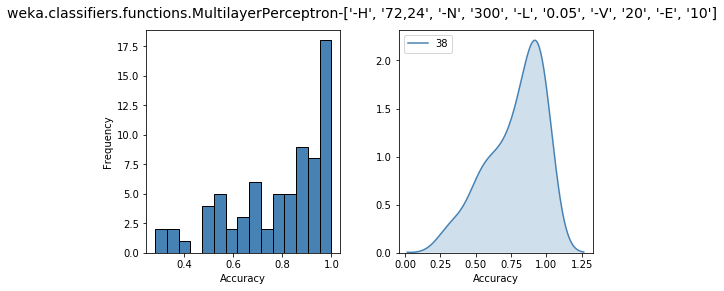

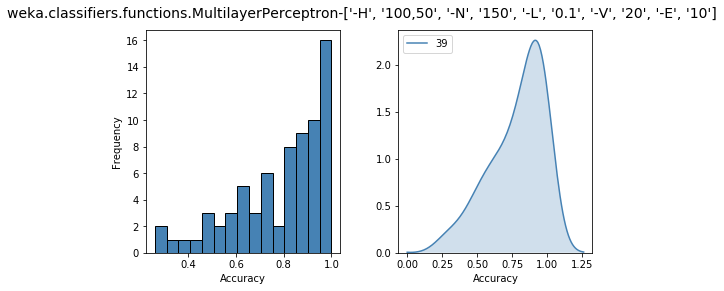

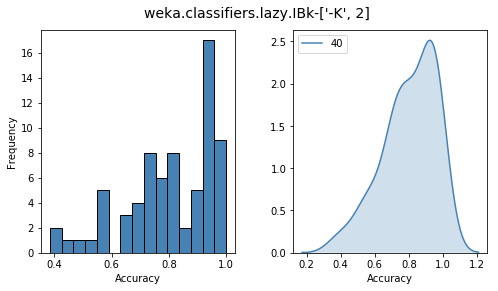

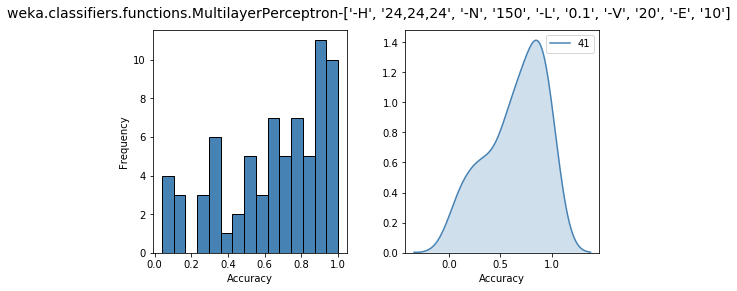

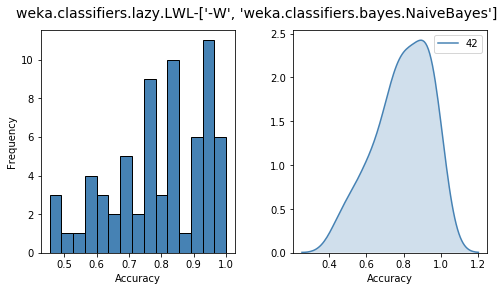

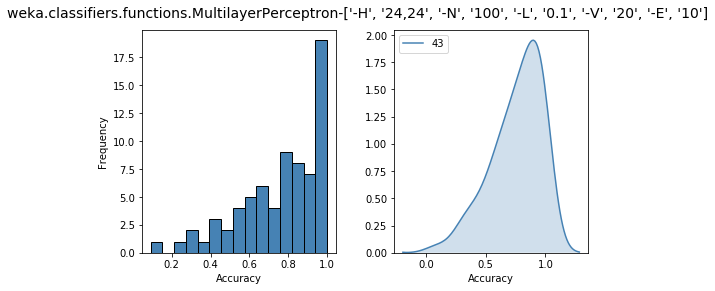

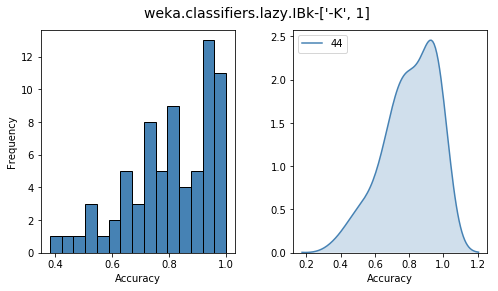

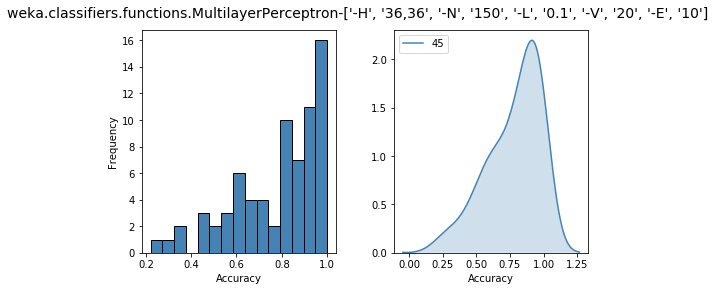

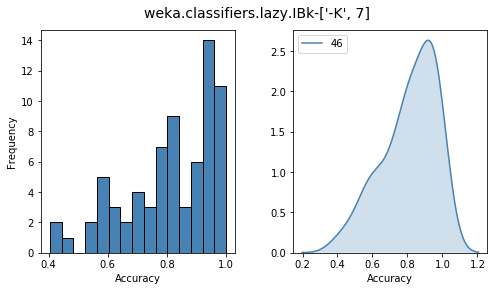

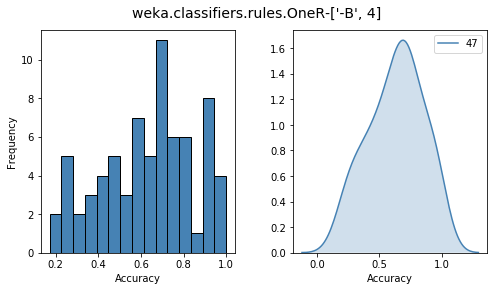

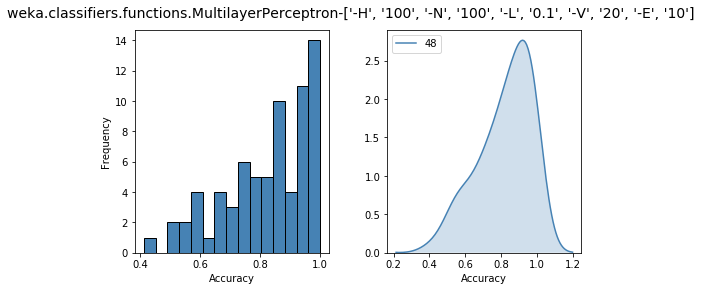

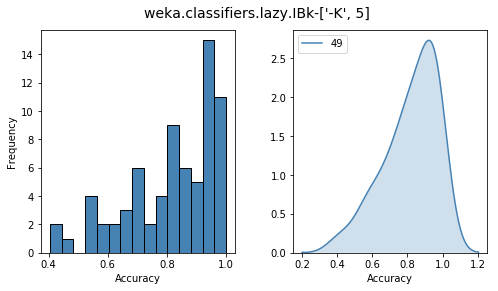

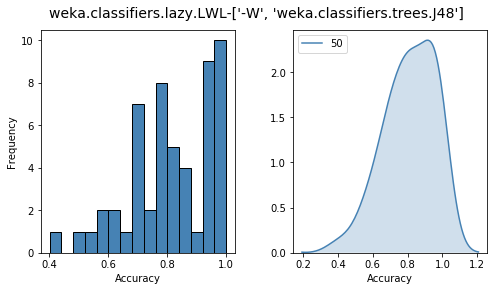

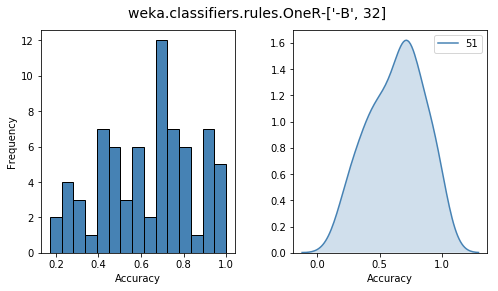

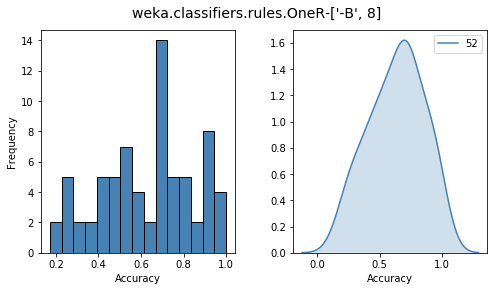

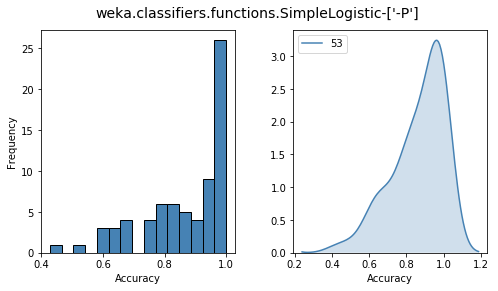

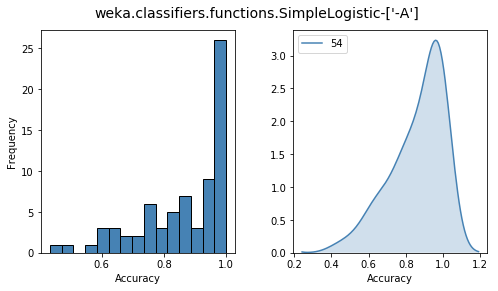

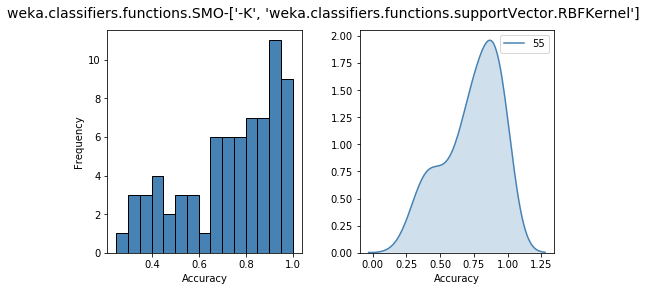

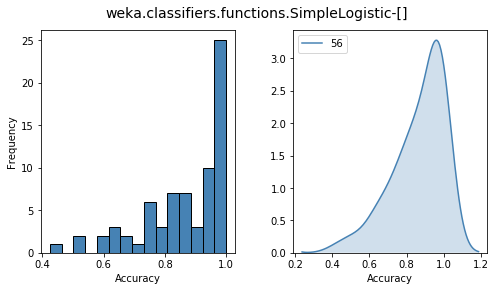

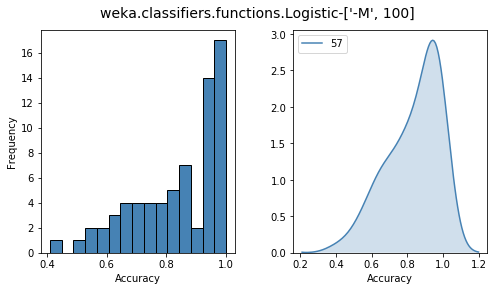

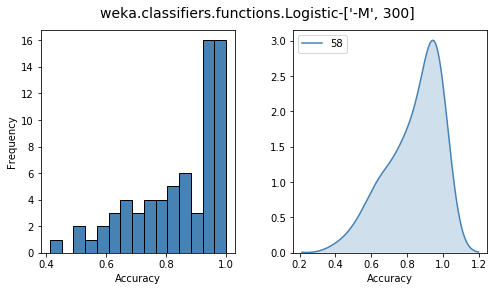

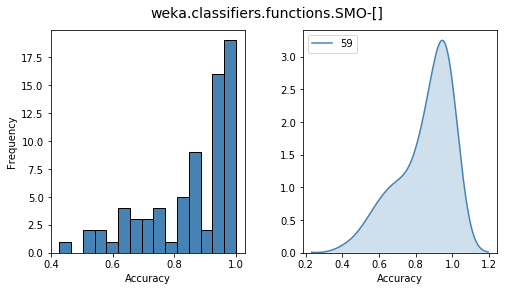

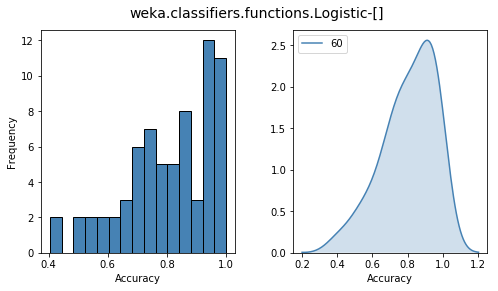

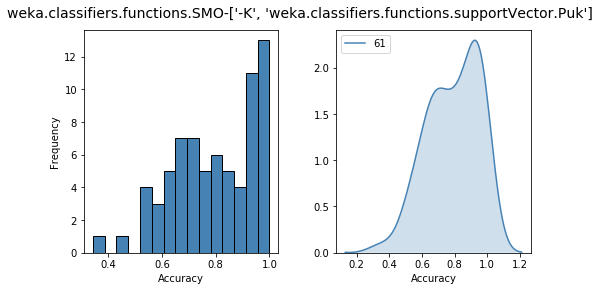

In [120]:
for i in range(62):
    # Histogram 
    fig = plt.figure(figsize=(8, 4))
    title = fig.suptitle( data_drop['clf name & configuration'][i], fontsize=14)
    fig.subplots_adjust(top=0.9, wspace=0.3)
    ax = fig.add_subplot(1,2,1)
    ax.set_xlabel('Accuracy')
    ax.set_ylabel('Frequency')
    freq, bins, patches = ax.hist(data_drop.iloc[i,1:].astype('float64'), color='steelblue', bins=15, edgecolor='black', linewidth=1 )
    # Density Plot

    fig.subplots_adjust(top=0.9, wspace=0.3)
    ax1 = fig.add_subplot(1,2,2)
    ax1.set_xlabel('Accuracy')
    sns.kdeplot(data_drop.iloc[i,1:].astype('float64'), ax=ax1, shade=True, color='steelblue')


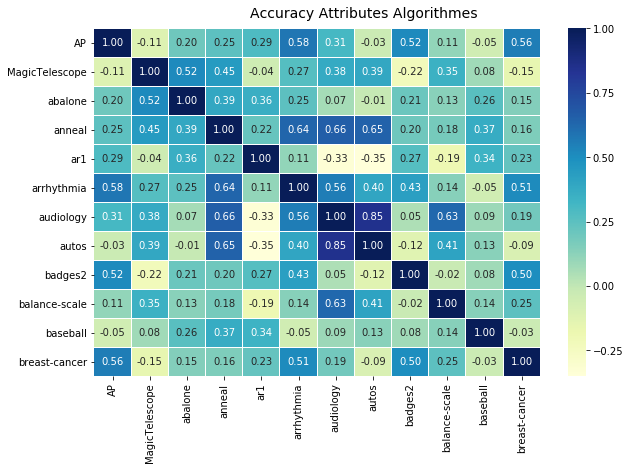

In [30]:
# Corralation Matrix Heatmap
f, ax = plt.subplots(figsize=(10, 6))
corr = data_history.iloc[:, 0:12].corr()
#heatmap

hm = sns.heatmap(round(corr, 2), annot=True, ax=ax, cmap='YlGnBu', fmt='.2f', linewidth=.05)
f.subplots_adjust(top=0.93, wspace=0.3)
t = f.suptitle("Accuracy Attributes Algorithmes", fontsize=14)